In [51]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [74]:
list_path=os.listdir(r"memo")
list_path=["memo/"+i for i in list_path]
list_path

['memo/LINE_ALBUM_slip_230227_167.jpg',
 'memo/LINE_ALBUM_slip_230227_24_0.jpg',
 'memo/LINE_ALBUM_slip_230227_315.jpg',
 'memo/LINE_ALBUM_slip_230227_316.jpg',
 'memo/LINE_ALBUM_slip_230227_317.jpg',
 'memo/LINE_ALBUM_slip_230227_327.jpg',
 'memo/LINE_ALBUM_slip_230227_328.jpg',
 'memo/LINE_ALBUM_slip_230227_329.jpg',
 'memo/LINE_ALBUM_slip_230227_330.jpg',
 'memo/LINE_ALBUM_slip_230227_340.jpg',
 'memo/LINE_ALBUM_slip_230227_341.jpg',
 'memo/LINE_ALBUM_slip_230227_342.jpg',
 'memo/LINE_ALBUM_slip_230227_346.jpg',
 'memo/LINE_ALBUM_slip_230227_368.jpg',
 'memo/LINE_ALBUM_slip_230227_378.jpg',
 'memo/LINE_ALBUM_slip_230227_392.jpg',
 'memo/LINE_ALBUM_slip_230227_394.jpg',
 'memo/LINE_ALBUM_slip_230227_403.jpg',
 'memo/LINE_ALBUM_slip_230227_49.jpg',
 'memo/LINE_ALBUM_slip_230227_50.jpg',
 'memo/LINE_ALBUM_slip_230227_55.jpg',
 'memo/LINE_ALBUM_slip_230227_66.jpg',
 'memo/LINE_ALBUM_slip_230227_6_0.jpg',
 'memo/LINE_ALBUM_slip_230227_76.jpg',
 'memo/LINE_ALBUM_slip_230227_92.jpg']

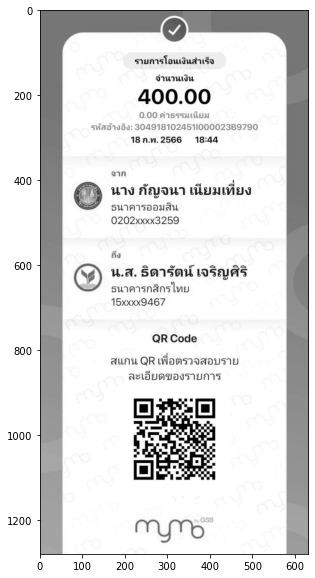

In [73]:
img = cv2.imread(list_path[0], 0)

# Apply Otsu's thresholding to the image
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [75]:
img = cv2.imread(list_path[0])

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the OCR reader
reader = easyocr.Reader(['th','en'])

# Perform OCR on the image
ls = reader.readtext(gray, detail=0, paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['รายการโอนเงินสำเร็จ',
 ' จำนวนเงิน',
 '400.00',
 ' o.0d ค่าธรรมเนียม',
 '',
 '',
 ' รหัสอ้างอิง: 304918102451!00002389790',
 '.',
 '18 ก.พ. 2566',
 '18:44',
 '',
 'จาก',
 'นาง',
 'กัญจนาเนียมเทียง',
 ' ธนาคารออมสิน',
 '0202xxxx3259',
 'ถึง',
 'กาง',
 'น.ส.',
 ' ธิดารัตน์ เจริญศิริ',
 '',
 'ธนาคารกสิกรไทย',
 '15xxxx9467',
 'or code',
 '.',
 ' สแกน or เพื่อตรวจสอบราย',
 '',
 'ละเอียดของรายการ',
 '.',
 '',
 'เาอ',
 'asb',
 'ญ6',
 'กuาา',
 '.',
 '.าอ',
 '',
 '.',
 '.',
 '.',
 'เว.า',
 '..',
 '',
 '.',
 '',
 '',
 '',
 'าา',
 '',
 '.าาอ',
 '',
 '',
 '',
 '.าา',
 'ง4',
 '~,',
 '',
 'กาาา',
 '',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 'าา',
 '.']

In [83]:
#Test the bank slip logical
list_path=os.listdir(r"memo")
list_path=["memo/"+i for i in list_path]
list_path

# Initialize the OCR reader
reader = easyocr.Reader(['en','th'])
 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,9)):
    img = cv2.imread(list_path[i])

    # Convert the image to grayscale

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



    ls = reader.readtext(gray, detail=0, paragraph=False)

    if (sum(1 for w in ls if 'ารออม' in w) >= 1 and sum(1 for w in ls if 'ารออม' in w) <= 2) and sum(1 for w in ls if 'xxxx' in w.lower()) == 2 :
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 9/9 [06:18<00:00, 42.02s/it]


In [84]:
# img_list[7]
check_list
# len('012045212258790754')

['1', '1', '1', '1', '1', '1', '1', '1', '1']

In [82]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['th','en'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k])
        if img is not None:  # check if image was loaded correctly
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ls = reader.readtext(gray, detail=0, paragraph=False)
            if (sum(1 for w in ls if 'ารออม' in w) >= 1 and sum(1 for w in ls if 'ารออม' in w) <= 2) and sum(1 for w in ls if 'xxxx' in w.lower()) == 2 :
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [01:44<00:00, 14.96s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:16<00:00, 19.47s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:57<00:00, 16.73s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [03:21<00:00, 28.72s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:45<00:00, 15.07s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [04:41<00:00, 40.24s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [02:15<00:00, 19.42s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [06:11<00:00, 53.13s/it]

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
